In [ ]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_datamining/movies_metadata.csv",low_memory=False)
# ratings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_datamining/ratings_small.csv",low_memory=False)
# credits = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_datamining/credits.csv")
# keywords = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_datamining/keywords.csv")
movies = pd.read_csv("movielen/movies_metadata.csv")
ratings = pd.read_csv("movielen/ratings_small.csv")
credits = pd.read_csv("movielen/credits.csv")
keywords = pd.read_csv("movielen/keywords.csv")

C:\Users\LinhVuPC\AppData\Local\Temp\ipykernel_7804\193196444.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("movielen/movies_metadata.csv")


#1. Tiền xử lý dữ liệu

In [5]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


**Các đặc trưng trong bộ dữ liệu phim gồm:**
- budget: Chi phí làm phim
- genre: Thể loại phim
- homepage: Link tới trang chủ của phim
- id: Id của phim
- keywords: Những từ khóa liên quan đến phim
- original_title: Tiêu đề của phim trước khi được dịch
- original_language: Ngôn ngữ mà phim được làm
- overview: Mô tả ngắn gọn về phim
- popularity: Thể hiện sự phổ biến của phim
- production_companies: Nhà sản xuất phim
- production_countries: Đất nước sản xuất phim
- release_date: Ngày ra mắt
- revenue: Doanh thu của phim
- runtime: Thời lượng phim
- status: Tình trạng phim 
- tagline: Câu nói ấn tượng của phim
- title: Tiêu đề của phim
- vote_average: Đánh giá trung bình của phim
- vote_count: Số lượt đánh giá


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Từ bảng trên ta có nhưng điểm bất hợp lý sau:
- Trên 75% các bộ phim có doanh thu là 0, cái này có thể hiểu rằng doanh thu không được thống kế một cách chính xác
- Thời gian phim ngắn nhất là 0p


Ta có các trường id và imdb_id đều là id đại diện cho phim nên có thể xóa cột imdb_id đi để cải thiện hiệu năng

In [ ]:
movies = movies.drop(['imdb_id'], axis=1)

Trường title và original_title đề thể hiện tiêu đề của bộ phim nhưng original_title là dùng tiếng bản địa, không có ý nghĩa lắm nên cũng xóa đi nốt

In [ ]:
print(movies[movies['original_title'] != movies['title']][['title', 'original_title']].head(10))
movies = movies.drop(['original_title'], axis=1)

                         title                    original_title
28   The City of Lost Children        La Cité des Enfants Perdus
29              Shanghai Triad                         摇啊摇，摇到外婆桥
32            Wings of Courage  Guillaumet, les ailes du courage
57                 The Postman                        Il postino
58            The Confessional                  Le confessionnal
67                French Twist                      Gazon maudit
72              Les Miserables                    Les misérables
79           The White Balloon                       بادکنک سفید
81              Antonia's Line                           Antonia
104            Nobody Loves Me                 Keiner liebt mich


Có 1558 bộ phim có thời lượng bằng 0p, ta k biết cách nào để thay thế giá trị này một cách hiệu quả, nên cách tốt nhất là xóa luôn 1558 bộ phim này đi cho lẹ

In [ ]:
print(movies[movies['runtime'] == 0].shape)
movies = movies[movies["runtime"].apply(lambda x: x != 0)]

(1558, 22)


In [ ]:
movies.isna().sum()

adult                        0
belongs_to_collection    39501
budget                       0
genres                       0
homepage                 36225
id                           0
original_language           10
overview                   547
popularity                   5
poster_path                289
production_companies         3
production_countries         3
release_date                64
revenue                      6
runtime                    263
spoken_languages             6
status                      70
tagline                  23633
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Hầu như chúng ta khó có thể xử lý dữ liệu nan được vì các trường thiếu nhiều như belongs_to_collection, homepage, tagline, overview, poster_path đều là các dữ liệu rời rạc và chính những bộ phim đó đều không tồn tại những dữ liệu đó nên chúng ta tạm thời bỏ qua. Các trường còn lại thì chúng ta đơn giản là xóa đi cho xong. 

In [ ]:
mask = movies["title"].isna()
movies = movies.loc[mask == False] # loại bỏ 6 phim mà không có title và phim có id là ngày

mask = movies["original_language"].isna()
movies = movies.loc[mask == False] 

mask = movies["status"].isna()
movies = movies.loc[mask == False] 

mask = movies["release_date"].isna()
movies = movies.loc[mask == False] 

mask = movies["runtime"].isna()
movies = movies.loc[mask == False] 

In [ ]:
movies.isna().sum()

adult                        0
belongs_to_collection    39130
budget                       0
genres                       0
homepage                 35866
id                           0
original_language            0
overview                   286
popularity                   0
poster_path                236
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
spoken_languages             0
status                       0
tagline                  23278
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [ ]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
# sử dụng mẫu dữ liệu nhỏ hơn 
movies['id'] = movies['id'].astype('int')
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
print(links_small.shape)
movies = movies[movies['id'].isin(links_small)]
movies.shape

(9112,)


(9077, 22)

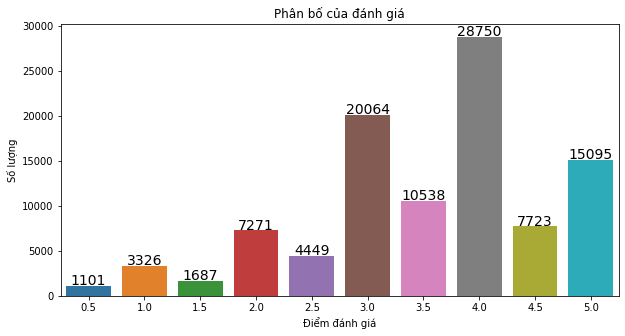

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=ratings, x='rating')
labels = (ratings['rating'].value_counts().sort_index())
plt.title('Phân bố của đánh giá')
plt.xlabel('Điểm đánh giá')
plt.ylabel("Số lượng")

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

Dựa vào biểu đồ phân bố đánh giá ta thấy được có khá ít lượt đánh giá thấp hẳn vì nếu người dùng đã không thích xem bộ phim đó thì cũng không quan tâm đến việc đánh giá phim đó làm gì. Vì vậy khi gợi ý thì mình sẽ không gợi ý những phim nào mà có đánh giá quá thấp.

# 2. Gợi ý dựa trên độ phổ biến

**Simple recommenders**: đưa ra các đề xuất tổng quát cho mọi người dùng, dựa trên mức độ phổ biến. Ý tưởng cơ bản đằng sau hệ thống này là những bộ phim nổi tiếng hơn và được giới phê bình đánh giá cao hơn sẽ có xác suất được khán giả bình thường thích cao hơn. Một ví dụ có thể là IMDB Top 250.

Sau đây là các bước liên quan:
* Quyết định chỉ số hoặc điểm số để xếp hạng phim.

* Tính điểm cho mọi bộ phim.

* Sắp xếp phim dựa trên điểm số và đưa ra kết quả hàng đầu.

Hệ thống sẽ đảm bảo rằng một bộ phim có rate bằng 9 từ 100.000 người bình chọn sẽ nhận được số điểm cao hơn so với một bộ phim có cùng rate nhưng chỉ có vài trăm người bình chọn.

$WeightedRating(WR)=(\frac{v}{v+m}⋅R)+(\frac{m}{v+m}⋅C)$

Trong đó,

* **v** là số votes cho bộ phim;
* **m** là mố votes tối thiểu cẩn thiết để tính toán;
* **R** là trung bình số đánh giá của bộ phim;
* **C** là trung bình vote trên toàn bộ dataset.

Ý nghĩa đơn giản của tham số m là sẽ loại bỏ những phim có số phiếu bầu thấp hơn một ngưỡng nhất định m
Trong thực nghiệm này, chúng tôi sử dụng m là phân vị thứ 90. Nói cách khác, để một bộ phim có mặt trong bảng xếp hạng, nó phải có số phiếu bình chọn nhiều hơn ít nhất 90% các bộ phim trong danh sách. (Mặt khác, nếu bạn đã chọn phần trăm thứ 75, bạn sẽ coi là 25% phim đứng đầu về số lượng phiếu bầu thu được. Khi phần trăm giảm đi, số lượng phim được xem xét sẽ tăng lên).


In [ ]:
# Tính toán trung bình của số vote
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.90)
print(C)
print(m)

6.365946898755095
1126.800000000001


Từ kết quả trên, bạn có thể thấy rằng xếp hạng trung bình của một bộ phim trên IMDB là khoảng 6.3 trên thang điểm 10.

Dựa vào m được tính toán, bạn có thể sử dụng điều kiện lớn hơn bằng với điều kiện để lọc ra các phim có số phiếu bầu lớn hơn 1126

1Dựa vào m được tính toán, bạn có thể sử dụng điều kiện lớn hơn bằng với điều kiện để lọc ra các phim có số phiếu bầu lớn hơn 1126

In [ ]:
# Lọc ra tất cả những bộ phim đạt chất lượng trong bộ dữ liệu
q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(908, 22)

In [ ]:
def getWeightedRating(movies, quantile = 0.6, max = 250):
  C = movies['vote_average'].mean()
  m = movies['vote_count'].quantile(quantile)
  q_movies = movies.copy().loc[movies['vote_count'] >= m]
  q_movies['score'] = q_movies.apply(weighted_rating_transformer, axis=1)
  q_movies = q_movies.sort_values('score', ascending=False)
  return q_movies.head(max)

def getWeightedRatingByGenre(movies, genre, quantile = 0.6, max = 250):
  gen_md = movies.copy()
  gen_md[gen_md.apply(lambda x: x["genres"].find(genre) >= 0, axis = 1)]

  C = gen_md['vote_average'].mean()
  m = gen_md['vote_count'].quantile(quantile)

  q_movies = gen_md.copy().loc[movies['vote_count'] >= m]
  q_movies['score'] = q_movies.apply(weighted_rating_transformer, axis=1)
  return q_movies.head(max)


# Hàm tính trọng số đánh giá của mỗi bộ phim dựa trên công thức được xây dựng ở phía trên
def weighted_rating_transformer(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Khai báo một đặc trưng điểm số "score " và tính toán giá trị của nó với hàm 'weighted_rating()'
q_movies['score'] = q_movies.apply(weighted_rating_transformer, axis=1)

Cuối cùng, hãy sắp xếp DataFrame theo thứ tự giảm dần dựa trên cột `score` và xuất ra tiêu đề, số vote, điểm trung bình và xếp hạng trọng số (score) của 10 phim hàng đầu.

In [ ]:
# Sắp xếp những bộ phim dựa trên điểm số đã được tính toán ở trên
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.246473
834,The Godfather,6024.0,8.5,8.163723
12481,The Dark Knight,12269.0,8.3,8.137315
2843,Fight Club,9678.0,8.3,8.098303
292,Pulp Fiction,8670.0,8.3,8.077551
351,Forrest Gump,8147.0,8.2,7.977156
15480,Inception,14075.0,8.1,7.971467
22879,Interstellar,11187.0,8.1,7.941322
1154,The Empire Strikes Back,5998.0,8.2,7.909941
522,Schindler's List,4436.0,8.3,7.908238


#3. Gợi ý dựa trên nội dung

**Content-based recommenders**: Hệ thống này sử dụng siêu dữ liệu mục, chẳng hạn như thể loại, đạo diễn, mô tả, diễn viên, v.v. cho phim, để đưa ra các đề xuất này. 

Để đạt được điều này, bạn sẽ tính toán điểm số tương tự `cosine` theo cặp cho tất cả các phim dựa trên mô tả cốt truyện của chúng và đề xuất các phim dựa trên ngưỡng điểm tương đồng đó.


Các trường như là overview, taglines, cast, crew, keywords, genre sẽ được sử dụng để tạo thành một metadata và dùng nó để xây dựng model

In [ ]:
movies.isna().sum()

adult                       0
belongs_to_collection    7403
budget                      0
genres                      0
homepage                 7104
id                          0
original_language           0
overview                    8
popularity                  0
poster_path                 3
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
status                      0
tagline                  2049
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

In [ ]:
movies_df = movies.copy()
movies_df = movies_df.fillna("")
movies_df.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
original_language        0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

Lấp đầy các trường rỗng bằng ký tự ""

Vấn đề hiện tại là vấn đề Xử lý ngôn ngữ tự nhiên. Do đó, ta cần trích xuất một số loại tính năng từ dữ liệu văn bản ở trên trước khi bạn có thể tính toán sự giống nhau và / hoặc không giống nhau giữa chúng.

Chúng ta sẽ tính toán Tần só từ, tần số văn bản nghịch đảo (`Term Frequency-Inverse Document Frequency`) (TF-IDF) vector cho mỗi văn bản. Cách tính này sẽ trả về cho bạn một ma trận, trong đó mỗi cột biểu diễn một từ trong đặc trưng `overview` (tất cả các từ mà xuất hiện trong ít nhất một văn bản), và mỗi cột biểu diễn một bộ phim.

Để tiện cho việc tính toán, chúng ta sử dụng phương thức `TfIdfVectorizer` của thư viện scikit-learn để tính ma trận TF-IDF matrix.

In [ ]:
# gọi TfIdfVectorizer từ thư viện scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Bổ sung phương thức linear_kernel từ thư viện sklearn để tính toán ma trận độ tương tự
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
# Chuyển đổi dặc trưng kiểu "stringified" về kiểu đối tượng tương ứng trong python
from ast import literal_eval



**cosine similarity**

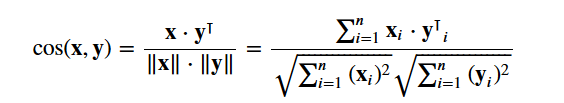

In [ ]:
# Gộp Keyword và credits vào trong bộ dataframe chính
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
movies['id'] = movies['id'].astype('int')
movies_df = movies.merge(credits, on='id')
movies_df = movies_df.merge(keywords, on='id')

In [ ]:

smd = movies_df.copy()

smd = smd[smd['id'].isin(links_small)]
print(smd.shape)

smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['genres'] = smd['genres'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

(9197, 25)


In [ ]:
smd.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,...,tagline,title,video,vote_average,vote_count,cast,crew,keywords,cast_size,crew_size
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",13,106
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",26,16
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",7,4
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",10,10
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",12,7


In [ ]:
def get_director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']
  return np.nan

def get_recommendations(smd, title, cosine_sim):
  smd = smd.reset_index()
  titles = smd[['id', 'title', "popularity", "vote_average", "vote_count", "genres", "crew", "director"]]
  indices = pd.Series(smd.index, index=smd['title'])

  idx = indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:250]
  movie_indices = [i[0] for i in sim_scores]
  return titles.iloc[movie_indices]

Tiếp thep, tôi sẽ xây dựng mộ hàm mà trả về top 3 phần tử hàng đầu hoặc toàn bộ danh sách, tùy theo phần tử nào nhiều hơn. Dưới đây là danh sách tham chiều từ `cast`, `keywords`, và `genres`

In [ ]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Kiểu tra nếu có nhiều hơn 3 phần tử tồn tại. Nếu đúng, trả về 3 cái đầu tiền. Nếu sai, trả về toàn bộ danh sách.
        if len(names) > 3:
            names = names[:3]
        return names

    # Trả về danh sách rỗng trong trường hợp dữ liệu bị thiếu/ không đúng định dạng
    return []

In [ ]:
# Khai báo đặc trưng director, cast, genres và keyword mới cái mà phù hợp với mẫu.
smd['director'] = smd['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    smd[feature] = smd[feature].apply(get_list)

In [ ]:
# In ra các bộ phim sau khi thêm 3 trường dữ liệu mới vào
smd[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


Ở bước tiếp theo chúng ta sẽ chuyển đổi trường tên và từ khóa thành chữ thường và loại bỏ khoảng trắng giữa chúng.

Loại bỏ khoảng cách giữa các từ rất quan trọng ở bước tiền xử lí. Nó được thực hiện để vectorizer của bạn không tính Johnny của "Johnny Depp" và "Johnny Galecki" là giống nhau. Sau bước xử lý này, các tác nhân nói trên sẽ được thể hiện dưới dạng "johnnydepp" và "johnnygalecki" và sẽ khác biệt với vectorizer của bạn

In [ ]:
# Hàm để chuyển tất cả chuỗi kí tự thành chữ thường và loại bỏ khoảng trẳng trong tên
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # kiểm tra nếu dạo diễn đã tồn tại. Nếu không thì trả về chuỗi trống
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Áp dụng hàm clean_data cho các đặc trưng.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    smd[feature] = smd[feature].apply(clean_data)

Giờ đây, bạn đã có thể tạo "movies soup", là một chuỗi chứa tất cả siêu dữ liệu mà bạn muốn cung cấp cho vectơ của mình (cụ thể là diễn viên, đạo diễn và từ khóa).

Hàm create_soup sẽ chỉ cần nối tất cả các cột được yêu cầu bằng một khoảng trắng. Đây là bước tiền xử lý cuối cùng và đầu ra của hàm này sẽ được đưa vào mô hình vector từ.

In [ ]:
def create_soup(x):
  return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres']) 

In [ ]:
# Tạo mới đặc trưng soup
smd['soup'] = smd.apply(create_soup, axis=1)

In [ ]:
count = CountVectorizer(analyzer='word', stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

Một điểm khác biệt chính là bạn sử dụng `CountVectorizer()` thay vì TF-IDF. Điều này là do không muốn giảm bớt sự xuất hiện của diễn viên / đạo diễn nếu anh ấy hoặc cô ấy đã tham gia diễn xuất hoặc đạo diễn trong các bộ phim tương đối nhiều hơn.

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
get_recommendations(smd, 'The Godfather', cosine_sim).head()

,id,title,popularity,vote_average,vote_count,genres,crew,director
1593,242,The Godfather: Part III,17.185349,7.1,1589.0,"[crime, drama, thriller]","[{'credit_id': '52fe422bc3a36847f8009737', 'de...",francisfordcoppola
987,240,The Godfather: Part II,36.629307,8.3,3418.0,"[drama, crime]","[{'credit_id': '52fe422bc3a36847f80094dd', 'de...",francisfordcoppola
5423,32303,Mitchell,1.588835,4.4,15.0,"[crime, drama, action]","[{'credit_id': '52fe44cb9251416c9101d24b', 'de...",andrewv.mclaglen
974,28,Apocalypse Now,13.5963,8.0,2112.0,"[drama, war]","[{'credit_id': '52fe4210c3a36847f80012c7', 'de...",francisfordcoppola
3290,28368,Gardens of Stone,2.787833,5.5,25.0,"[drama, history]","[{'credit_id': '52fe4590c3a368484e06276b', 'de...",francisfordcoppola


Mặc dù hệ thống đã gợi ý được các phim tương tự nhau nhưng chúng ta muốn hệ thông nên gợi ý những phim mà có phổ biến cao, do đó chúng ta kết hợp với hệ thống gợi ý theo độ phổ biến ở mục 2 để cải thiện hiệu năng của hệ thống này

In [ ]:
pre = get_recommendations(smd, 'The Godfather', cosine_sim).head(50)
getWeightedRating(pre)

,id,title,popularity,vote_average,vote_count,genres,crew,director,score
987,240,The Godfather: Part II,36.629307,8.3,3418.0,"[drama, crime]","[{'credit_id': '52fe422bc3a36847f80094dd', 'de...",francisfordcoppola,7.820487
3398,111,Scarface,11.299673,8.0,3017.0,"[action, crime, drama]","[{'credit_id': '52fe4219c3a36847f8003e1f', 'de...",briandepalma,7.555661
974,28,Apocalypse Now,13.5963,8.0,2112.0,"[drama, war]","[{'credit_id': '52fe4210c3a36847f80012c7', 'de...",francisfordcoppola,7.431502
5,949,Heat,17.924927,7.7,1886.0,"[action, crime, drama]","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",michaelmann,7.201058
379,6075,Carlito's Way,8.698509,7.7,805.0,"[action, crime, drama]","[{'credit_id': '52fe443bc3a36847f8089ed7', 'de...",briandepalma,6.921860
1196,9366,Donnie Brasco,12.201954,7.4,1175.0,"[crime, drama, thriller]","[{'credit_id': '52fe44eec3a36847f80b278b', 'de...",mikenewell,6.893800
2695,968,Dog Day Afternoon,7.530126,7.6,685.0,"[crime, drama, thriller]","[{'credit_id': '52fe4294c3a36847f8029dd7', 'de...",sidneylumet,6.832514
1593,242,The Godfather: Part III,17.185349,7.1,1589.0,"[crime, drama, thriller]","[{'credit_id': '52fe422bc3a36847f8009737', 'de...",francisfordcoppola,6.795437
1515,654,On the Waterfront,18.211093,8.0,368.0,"[crime, drama]","[{'credit_id': '52fe4265c3a36847f801b1b1', 'de...",eliakazan,6.768229
2994,9040,Serpico,12.842165,7.5,429.0,"[crime, drama, history]","[{'credit_id': '52fe44d5c3a36847f80acb73', 'de...",sidneylumet,6.678653


Bây giờ hệ thống mới sẽ gợi ý những phim có nội dung tương tự hoặc cùng đạo diễn nhưng phim đó phải là những phim mà có nhiều người xem

# 4. Sử dụng Lọc cộng tác (Collaborative Filtering)

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 5.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630172 sha256=9c20af58b4fa5bee19b6199be8a9a85bb6135bc9ae2417f512d76fc44161787c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


Xây dựng lớp Collaborative Filtering

In [ ]:
from scipy import sparse

In [ ]:
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate
reader = Reader()

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8952  0.8992  0.8873  0.8965  0.8963  0.8949  0.0040  
MAE (testset)     0.6868  0.6925  0.6856  0.6899  0.6920  0.6893  0.0027  
Fit time          7.16    11.62   12.50   5.37    5.46    8.42    3.05    
Test time         0.57    0.43    0.34    0.20    0.32    0.37    0.13    


{'fit_time': (7.164085388183594,
  11.61609959602356,
  12.504287719726562,
  5.3746178150177,
  5.459028959274292),
 'test_mae': array([0.68675408, 0.69246773, 0.68558274, 0.68993508, 0.69195904]),
 'test_rmse': array([0.89520145, 0.89922847, 0.88734721, 0.8964955 , 0.89634028]),
 'test_time': (0.5724053382873535,
  0.43425989151000977,
  0.34319138526916504,
  0.19560956954956055,
  0.3247687816619873)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId'] == 70]

,userId,movieId,rating,timestamp
9917,70,1,5.0,853954235
9918,70,3,5.0,853954323
9919,70,5,5.0,853954323
9920,70,7,3.0,853954323
9921,70,9,3.0,853954486
...,...,...,...,...
9995,70,1059,5.0,853955020
9996,70,1061,5.0,853955020
9997,70,1073,5.0,853954401
9998,70,1356,5.0,853954485


In [ ]:
mf = movies.copy()
svd.predict(70, 3)

Prediction(uid=70, iid=3, r_ui=None, est=4.154143647247042, details={'was_impossible': False})

In [ ]:
def getCFRecommend(uId, movies, max = 250):
  def trans(x):
    if(x["id"] == i):
      x[m] = i 
    else:
      x[m] = 0
    pass

  l = []
  ids = movies["id"].values
  for i in ids:
    l.append([svd.predict(uId, i).eơist, i])
  l = sorted(l, reverse = True)
  l = l[:max]
  df = pd.DataFrame(l)
  df.columns = ["max", "id"]
  m = movies.merge(df, on=["id"])
  m = m.sort_values("max", ascending = False)
  return m

In [ ]:
getCFRecommend(70, mf, 30)[["title", "id", "popularity"]]

,title,id,popularity
0,Nell,1945,5.930957
1,Once Were Warriors,527,4.025276
28,Far from the Madding Crowd,3469,4.377296
27,License to Wed,2959,7.102076
26,The Good Shepherd,1247,11.057536
25,Flags of Our Fathers,3683,9.224494
24,Madagascar,953,16.136217
23,Rumble Fish,232,8.20519
22,The Dreamers,1278,6.685981
20,Cold Mountain,2289,9.645543


In [ ]:
knn = KNNBasic()
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9637  0.9704  0.9659  0.9711  0.9666  0.9675  0.0028  
MAE (testset)     0.7449  0.7441  0.7410  0.7460  0.7438  0.7440  0.0017  
Fit time          0.18    0.21    0.25    0.18    0.17    0.20    0.03    
Test time         1.84    1.81    1.94    1.60    1.65    1.77    0.13    


{'fit_time': (0.18224811553955078,
  0.2125530242919922,
  0.24669361114501953,
  0.17910313606262207,
  0.1726703643798828),
 'test_mae': array([0.74493485, 0.74409679, 0.74101928, 0.74602709, 0.74383926]),
 'test_rmse': array([0.96366075, 0.97040289, 0.96587504, 0.97111255, 0.96662107]),
 'test_time': (1.8404357433319092,
  1.8099653720855713,
  1.9432885646820068,
  1.5980284214019775,
  1.6519770622253418)}

In [ ]:
knn.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
knn.predict(70, 278)

Prediction(uid=70, iid=278, r_ui=None, est=3.1947347691238632, details={'actual_k': 4, 'was_impossible': False})

#5. Gợi ý kết hợp CB CF

Sử dụng content based để tìm ra các bộ phim tương tự với phim mà người dùng đang xem và sử dùng CF để dự đoán xem người dùng có thích các bộ phim đó không và sắp xếp lại

In [ ]:
def hibrid(movies, cosine_sim, uId, title, max = 250):
  return getCFRecommend(uId, get_recommendations(movies, title, cosine_sim).head(max), max)
  

In [ ]:
hibrid(smd, cosine_sim,  71, "Star Wars").head(30)[["title", "popularity"]]

,title,popularity
185,Escape from New York,10.124544
37,Tron,16.574021
12,Raiders of the Lost Ark,19.901576
191,Conquest of the Planet of the Apes,12.843375
33,Star Trek II: The Wrath of Khan,7.160236
40,Total Recall,12.954444
17,Impostor,8.209652
237,The Sorcerer's Apprentice,12.533525
177,Cutthroat Island,7.284477
38,King Kong vs. Godzilla,2.894775


#6. Gợi ý sử dụng luật kết hợp

Chúng ta coi mỗi một người dùng sẽ là một transaction và mỗi một bộ phim là sẽ là một item, và mỗi một nhận xét của người dùng cho bộ phim (k phân biệt điểm số đánh giá) để thể hiện người dùng có tương tác với bộ phim đó hay không

In [ ]:
# transactionMatrix = {}
# movieIds = sorted(list(movies["id"]))
# userTransactions = {}
# ratingsT = ratings.T
# for j in range(len(ratings)):
#   i = ratingsT[j]
#   t = userTransactions.get(int(i["userId"]), [])
#   userTransactions[int(i["userId"])] = t + [int(i["movieId"])]
    

In [ ]:
# movieIdsInt = []
# for i in movieIds:
#   try:
#     movieIdsInt.append(int(i))
#   except:
#     print(i)
# movieIdsInt = sorted(movieIdsInt)

# for i in userTransactions.keys():
#   ms = userTransactions[i]
#   transactionMatrix[i] = movieIdsInt.copy()

# print(userTransactions[1])
# print(movieIdsInt)



In [ ]:
movies_df = movies.copy()
ratings_df = ratings.copy()


movies_df = movies_df.astype({"id": "int64"})
data_df = pd.merge(ratings_df, movies_df[["id", "title", "vote_average",	"vote_count", "popularity"]], left_on = "movieId", right_on = "id")
data_df.drop(["timestamp", "id"], inplace = True, axis = 1)
data_df = data_df.drop_duplicates(["userId", "title"])
movies_unique = data_df.drop_duplicates(["title"])
data_df

,userId,movieId,rating,title,vote_average,vote_count,popularity
0,1,1371,2.5,Rocky III,6.6,894.0,11.673366
1,4,1371,4.0,Rocky III,6.6,894.0,11.673366
2,7,1371,3.0,Rocky III,6.6,894.0,11.673366
3,19,1371,4.0,Rocky III,6.6,894.0,11.673366
4,21,1371,3.0,Rocky III,6.6,894.0,11.673366
...,...,...,...,...,...,...,...
32130,652,103731,5.0,Mud,7.0,1080.0,7.881579
32131,653,2103,3.0,Solaris,5.9,378.0,10.642824
32132,659,167,4.0,K-PAX,7.1,710.0,12.400152
32133,659,563,3.0,Starship Troopers,6.7,1584.0,14.412644


In [ ]:
data_pivot = data_df.pivot(index = "userId", columns="title", values="rating").fillna(0)
data_pivot = data_pivot.astype("int64")
def encode_ratings(x):
  if x < 1:
    return 0
  else:
    return 1

data_pivot = data_pivot.applymap(encode_ratings)
data_pivot

title,...And God Created Woman,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,13 Tzameti,1408,15 Minutes,16 Blocks,...,Z,Zardoz,Zatoichi,Zazie dans le métro,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,eXistenZ,xXx,¡Three Amigos!
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. Support: thể hiện số user đã đánh giá bộ phim đó trên toàn bộ user
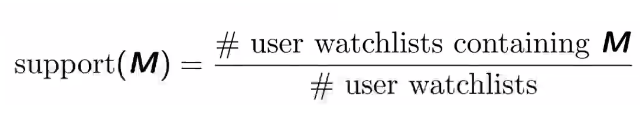

2. Confidence
Thể hiện tỉ lệ số người xem bộ phim A sẽ xem bộ phim B
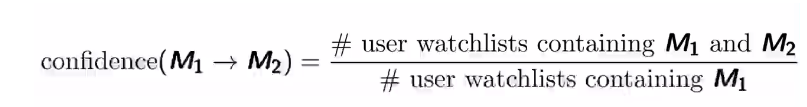

3. Lift: thể hiện mức độ xuất hiện cùng nhau của 2 phim

- lift = 1: 2 bộ phim xuất hiện cùng nhau do ngẫu nhiên
- lift > 1: 2 bộ phim có tần suất xuất hiện cùng nhau nhiều hơn
- lift < 1: 2 bộ phim xuất hiện cùng nhau ít hơn

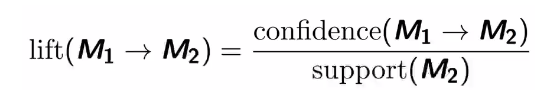

Người ta thường dùng lift để đánh giá hơn là confidence vì confidence(a->b) sẽ khác confidence(b->a) những lift của chúng thì sẽ như nhau


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
itemset = frequent_itemset = apriori(data_pivot, min_support=0.06, use_colnames=True)

In [ ]:
itemset

,support,itemsets
0,0.102832,"(20,000 Leagues Under the Sea)"
1,0.129657,(2001: A Space Odyssey)
2,0.064083,(28 Weeks Later)
3,0.298063,(48 Hrs.)
4,0.064083,(88 Minutes)
...,...,...
120847,0.062593,"(Terminator 3: Rise of the Machines, Monsoon W..."
120848,0.064083,"(Terminator 3: Rise of the Machines, Monsoon W..."
120849,0.061103,"(Terminator 3: Rise of the Machines, Monsoon W..."
120850,0.064083,"(Terminator 3: Rise of the Machines, Monsoon W..."


In [ ]:
rules = association_rules(itemset, metric="lift", min_threshold=1.1)

In [ ]:
result_df = rules.sort_values(by=["lift"], ascending = False)
result_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2005724,"(Rain Man, Psycho, Back to the Future Part II)","(A Nightmare on Elm Street, Monsoon Wedding, N...",0.077496,0.092399,0.062593,0.807692,8.741315,0.055433,4.719523
2005705,"(A Nightmare on Elm Street, Monsoon Wedding, N...","(Rain Man, Psycho, Back to the Future Part II)",0.092399,0.077496,0.062593,0.677419,8.741315,0.055433,2.859762
2210677,"(Light of Day, The 39 Steps, A Nightmare on El...","(Rope, Bridge to Terabithia, The Conversation)",0.084948,0.083458,0.061103,0.719298,8.618734,0.054013,3.265183
2210696,"(Rope, Bridge to Terabithia, The Conversation)","(Light of Day, The 39 Steps, A Nightmare on El...",0.083458,0.084948,0.061103,0.732143,8.618734,0.054013,3.416195
3592247,"(License to Wed, A Nightmare on Elm Street, Th...","(Rope, Terminator 3: Rise of the Machines, Res...",0.081967,0.090909,0.064083,0.781818,8.600000,0.056632,4.166667
...,...,...,...,...,...,...,...,...,...
3934,(Silent Hill),(Men in Black II),0.315946,0.333830,0.116244,0.367925,1.102131,0.010772,1.053940
137525,"(The Conversation, Terminator 3: Rise of the M...",(The 39 Steps),0.156483,0.432191,0.074516,0.476190,1.101806,0.006885,1.083999
137532,(The 39 Steps),"(The Conversation, Terminator 3: Rise of the M...",0.432191,0.156483,0.074516,0.172414,1.101806,0.006885,1.019250
6259,(The Conversation),(The Thomas Crown Affair),0.292101,0.208644,0.067064,0.229592,1.100401,0.006119,1.027191


In [ ]:
def getRulesWith(data, movieName, threshold = 2):
  # lấy rules liên quan đến phim
  #
  re = data[data["antecedents"].apply(lambda x: len(x) == 1 and next(iter(x)) == movieName)]
  return re[re["lift"] > threshold]

def getMovieByTitle(data, title):
   return data[data["title"].apply(lambda x: x == title)]

def getRecommendation(movieList, movieDataSet, minPopularity = 2, max = 20):
  re = []
  for m in movieList:
    for title in m:
      if title not in re:
        p = getMovieByTitle(movieDataSet, title)["popularity"].values[0]
        if(float(p) > minPopularity):
          re.append(title)
  return re[0: max]

r = getRulesWith(result_df, 'Star Wars')
getRecommendation(r["consequents"].values, movies_unique)


['Rain Man',
 'Aliens vs Predator: Requiem',
 'Psycho',
 'Night on Earth',
 'Titanic',
 'The Hours',
 '48 Hrs.',
 'Big Fish',
 'Monsoon Wedding',
 'The Conversation',
 'The Million Dollar Hotel',
 'Reservoir Dogs',
 'A Nightmare on Elm Street',
 'Solaris',
 'Terminator 3: Rise of the Machines',
 'Three Colors: Red',
 'Wag the Dog',
 'Silent Hill',
 'Men in Black II',
 'The Passion of Joan of Arc']

Sử dụng luật kết hợp để gợi ý phim cho người dùng đưa ra kết quả khá thuyết phục khi đề xuất ra các phim có tương tác nhiều bởi các người dùng tuy nhiên lại có một số nhược điểm sau:
- Cần phải nhiều dữ liệu đánh giá của người dùng để có thể gợi ý, nên hệ thống sẽ phải hoạt động một thời gian để có dữ liệu
- Dữ liệu gợi ý không mang đặc điểm cá nhân của một người dùng mà là mỗi liên quan giữa các phim với nhau sẽ được giải thích ở ý dưới
- Luật kết hợp chỉ xét các tương tác của người dùng với phim xem có tương tác hoặc không tương tác chứ không quan tâm đến số sao của đánh giá đó. Đo đó có thể gợi ý một số phim mà người dùng không thích nhưng với lượng nhận xét cao. Điều này chúng tôi đã khắc phục bằng cách xét tiếp độ phổ biến của phim đó trong lúc gợi ý nhưng không phải bộ dữ liệu nào cũng có độ phổ biến, và khi xét thêm độ phổ biến thì sẽ có lúc hệ thống không gợi ý ra phim gì cả vì độ phổ biến rất thấp.

#7. Kết luận

Trong bài tập lớn này chúng em đã sử dụng 5 mô hình để khuyến nghị phim cho người dùng:

1. Gợi ý bằng weighted rating: Hệ thống dựa vào vote và số lượng vote để gợi ý. Các phim được gợi ý thường là top các phim phổ biến, được đánh giá cao bởi người dùng
2. Gợi ý bằng lọc nội dung có cải tiến bằng cách kết hợp với cách 1: Hệ thống này sẽ đưa ra các phim có nội dung tương tự như là cùng đạo diễn, diễn viên, thể loại và nội dung giống nhau. Tuy nhiên những phim có nội dung tương tự nhau chưa chắc đã là phim mà người dùng có thể quan tâm, nên chúng em kết hợp với cách 1, để gợi ý những phim và vừa tương tự những cũng phải phổ biến với mong muốn người dùng có thể sẽ thích nó.
3. Gợi ý bằng lọc cộng tác: Hệ thống sẽ dựa vào sở thích của người dùng những người dùng khác tương tự để gợi ý những phim mà người dùng khác đã xem những người dùng này chưa xem. Tuy nhiên phim được gợi ý chưa chắc đã hợp với thể loại hay đạo diễn mà người dùng đang quan tâm.
4. Gợi ý kết hợp 2 phương pháp 3 và 4: Hệ thống gợi ý được các phim tương tự với phim hiện tại đang xem và người dùng cũng có thể sẽ thích những phim đó. (Có thể kết hợp được với hệ thống 1 nhằm tăng hiệu năng hoặc giảm, không lường trước được)
5. Gợi ý bằng luật kết hợp: Hệ thống gợi ý dựa trên xu hướng tương tác của các người dùng trong quá khứ, đa số những người dùng xem phim này sẽ xem phim kia. Tuy nhiên cách gợi ý này không quan tâm đến sở thích của người dùng và cũng không thể gợi ý các phim mà chưa từng có ai đánh giá cả. Có thể khắc phục bằng cách kết hợp lại nhưng độ hiệu quả thì chúng em không biết ạ.
